In [ ]:
import torch
import torch.nn as nn
import torchvision #dataset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [ ]:
#device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') 
device

device(type='cpu')

In [ ]:
#Fetch Data
train_dataset = torchvision.datasets.MNIST(root='./data', train= True, transform = transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train= False, transform = transforms.ToTensor())

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
train_dataset.data.shape , test_dataset.data.shape

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

In [ ]:
#Set Parameters
input_size = 784 #28x28
hidden_size = 100
num_classes = 10 #0-9
num_epochs = 10
batch_size = 100
learning_rate = 0.001

In [ ]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle= True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size)

In [ ]:
#Check some sample data
samples = iter(train_loader)
img,label = samples.next() #loads first batch
print(img.shape, label.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


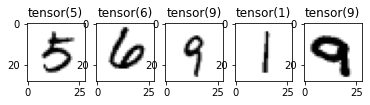

In [ ]:
sample_size = 5
for i in range(sample_size):
  plt.subplot(1,sample_size,i+1)
  plt.imshow(img[i][0], cmap='binary')
  plt.title(label[i])
plt.show()

In [ ]:
class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNet, self).__init__()
    self.l1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size, num_classes)

  def forward(self,x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    return out

In [ ]:
model = NeuralNet(input_size, hidden_size, num_classes)

#loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

#training_loss
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    #100,1,28,28 => 100,784
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)

    #forward
    outputs = model(images)
    loss = criterion(outputs, labels)

    #backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1)%200 == 0:
      print(f'epoch {epoch+1} / {num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}' )


epoch 1 / 10, step 200/600, loss = 0.3332
epoch 1 / 10, step 400/600, loss = 0.2012
epoch 1 / 10, step 600/600, loss = 0.3890
epoch 2 / 10, step 200/600, loss = 0.3407
epoch 2 / 10, step 400/600, loss = 0.2055
epoch 2 / 10, step 600/600, loss = 0.1829
epoch 3 / 10, step 200/600, loss = 0.3248
epoch 3 / 10, step 400/600, loss = 0.1144
epoch 3 / 10, step 600/600, loss = 0.1543
epoch 4 / 10, step 200/600, loss = 0.0473
epoch 4 / 10, step 400/600, loss = 0.0965
epoch 4 / 10, step 600/600, loss = 0.0824
epoch 5 / 10, step 200/600, loss = 0.1475
epoch 5 / 10, step 400/600, loss = 0.0840
epoch 5 / 10, step 600/600, loss = 0.1154
epoch 6 / 10, step 200/600, loss = 0.0725
epoch 6 / 10, step 400/600, loss = 0.0976
epoch 6 / 10, step 600/600, loss = 0.0692
epoch 7 / 10, step 200/600, loss = 0.1019
epoch 7 / 10, step 400/600, loss = 0.0206
epoch 7 / 10, step 600/600, loss = 0.0434
epoch 8 / 10, step 200/600, loss = 0.0494
epoch 8 / 10, step 400/600, loss = 0.0904
epoch 8 / 10, step 600/600, loss =

In [ ]:
torch.save(model, "FFNN.model")

In [ ]:
model = torch.load("FFNN.model")

In [ ]:
#test
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  for images, labels in test_loader:
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)
    outputs = model(images)

    #value, index
    _, predictions = torch.max(outputs,1)
    n_samples += labels.shape[0]
    n_correct += (predictions == labels).sum().item()

  accuracy = (n_correct / n_samples )*100
  print("Accuracy : ", accuracy)


Accuracy :  97.47
